# Tutorial 6.3. Structural Modeling Using Parametric Optimizable Beam Model

### Description: The structural modeling can be done by simplified MDoF system as seen in excercise 3. Here a robust and generic modeling of MDoF system is presented through a Parametric Optimizable beam. The beam model can be obtained from the github page [ParOptBeam](https://github.com/mpentek/ParOptBeam). This is a guide for setting up an example problem in the framework. The exercise demonstrates some of the capabilities and students are advised to check the implementation and other capabilities. 


Project: Structural Wind Engineering WS19-20 
        Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek
        
Author: anoop.kodakkal@tum.de, mate.pentek@tum.de

Created on:  12.12.2019

Last update: 08.01.2020

##### Contents:

 1. Input parameters
 2. Available beam models - Timoshenko, Euler-Bernoulli etc
 3. Available analysis type - Static, Dynamic, Eigen value analysis etc

### Step 0: Clone the repo
either

#### 1.  'git clone https://github.com/mpentek/ParOptBeam.git '

#### 2.  download as zip file the contents of [ParOptBeam](https://github.com/mpentek/ParOptBeam/archive/master.zip)

#### Important: Run this script from the directory ParOptBeam


importing the required packages and files 

In [1]:
# import
from source.model.structure_model import StraightBeam
from source.analysis.analysis_controller import AnalysisController

In [ ]:
The inputs are defined as dictionaries with various options. The options are as listed below with some basic explanations. Most of the naming is self explanatory. The unit system adopted are SI units(N,m,s) unless defined otherwise. 

__model_parameters__ : defines the details of the model
domain_size can be 2D or 3D 
other options for boundary_conditions 
* fixed-fixed
* pinned-pinned
* fixed-pinned
* pinned-fixed
* fixed-free
* free-fixed

In [2]:
# inputs 
parameters = {}

parameters["model_parameters"] = {
        "name": "GenericBuilding",
        "domain_size": "3D",
        "boundary_conditions": "fixed-free"}


__system_parameters__: defines the beam formulation 

available models are 
* Bernoulli beam
* Timoshenko beam
* Co-rotational beam

available models 
* Linear 
* Non-linear


In [3]:
parameters["model_parameters"]["system_parameters"]={
            "element_params": {
                "type": "Timoshenko",
                "is_nonlinear": False
            }}


__material_parameters__ : defines the material properties of the beam 

you may define the material properties of the beam

In [4]:

parameters["model_parameters"]["system_parameters"]["material"] = {
                "is_nonlinear": False,
                "density": 160.0,
                "youngs_modulus": 2.861e8,
                "poisson_ratio": 0.1,
                "damping_ratio": 0.0
            }

__geometry_parameters__ : defines the geometry of the structure

It is possible to define the various intervals of the structure with varying geometric parameters

number of elements indicate to the total number of elements and not on each intervals 
__coordinate system__ 

The following coordinate system may be (not necessarily) followed for the project:

x - along the longitudinal axis 

y - along the wind 

z - across the wind

In [5]:
parameters["model_parameters"]["system_parameters"]["geometry"] = {
                "length_x": 180,
                "number_of_elements": 3,
                "defined_on_intervals": [{
                    "interval_bounds" : [0.0, 60.0],
                    "length_y": [55.0],
                    "length_z": [35.0],
                    "area"    : [1925.0],
                    "shear_area_y" : [1605.0],
                    "shear_area_z" : [1605.0],
                    "moment_of_inertia_y" : [196510.0],
                    "moment_of_inertia_z" : [458260.0],
                    "torsional_moment_of_inertia" : [691771.0]},
                    {
                    "interval_bounds" : [60.0, 120.0],
                    "length_y": [45.0],
                    "length_z": [30.0],
                    "area"    : [1350],
                    "shear_area_y" : [1125.0],
                    "shear_area_z" : [1125.0],
                    "moment_of_inertia_y" : [101250.0],
                    "moment_of_inertia_z" : [227813.0],
                    "torsional_moment_of_inertia" : [329063.0]},
                    {
                    "interval_bounds" : [120.0, "End"],
                    "length_y": [35.0],
                    "length_z": [25.0],
                    "area"    : [875.0],
                    "shear_area_y" : [729.0],
                    "shear_area_z" : [729.0],
                    "moment_of_inertia_y" : [45573.0],
                    "moment_of_inertia_z" : [89323.0],
                    "torsional_moment_of_inertia" : [134896.0]}]
            }


__optimization_parameters__: defines the optimization parameters for fine tuning the structure. 

It is possible to do an optimization of various structural parameters to match to eigen frequency for various modes. 
The density can also be optimized to match the total weight of the building. 

In [6]:
parameters["optimization_parameters"] =  {
        "adapt_for_target_values": {
            "density_for_total_mass": 38880000.0,
            "geometric_properties_for": {
                "help": "first entry: sway_y, second entry: sway_z, -1: shear, +1: bending",
                "partition_shear_bending": [-1, 1],
                "consider_decomposed_modes": ["sway_z","sway_y", "torsional"],
                "corresponding_mode_ids" : [1, 1, 1],
                "corresponding_eigenfrequencies": [0.23,0.20,0.40]}}
    }


__analysis_parameters__ : defines the analysis parameters options 

Report directory can be defined as relative/absolute path

A skin model is also available to visualize the structure


In [7]:
parameters["analyses_parameters"] = {
        "global_output_folder" : "some/path",
        "model_properties": {
            "write": True,
            "plot":True
        }}
parameters["analyses_parameters"]["report_options"] = {
            "combine_plots_into_pdf" : True,
            "display_plots_on_screen" : False,
            "use_skin_model" : False
        }

__skin_model_parameters__ : defines the details of the skin model 

you may check out the other options available


In [8]:
parameters["analyses_parameters"]["skin_model_parameters"] = {
            "geometry": [ [0, -22.5, -15.0], [0, -22.5, 15], [0, 22.5, 15],
                          [0, 22.5, -15]
            ],
            "contour_density": 1,
            "record_animation": True,
            "visualize_line_structure": True,
            "beam_direction": "x",
            "scaling_vector": [1.0, 1.0 , 1.0, 1.0, 1.0, 1.0, 1.0],
            "eigenmode_scaling_factor" : 1e5,
            "dynamic_scaling_factor" : 1e3
        }


__Eigenvalue analysis__ : defines the options for eigenvalue analysis 

you may check out the other options available

In [9]:

parameters["analyses_parameters"]["runs"] = [{
                "type": "eigenvalue_analysis",
                "settings": {
                    "normalization": "mass_normalized"},
                "input":{},
                "output":{
                    "eigenmode_summary": {
                        "write" : True, 
                        "plot" : True},
                    "eigenmode_identification": {
                        "write" : True, 
                        "plot" : True},
                    "selected_eigenmode": {
                        "plot_mode": [1,2,3], 
                        "write_mode": [1,2,3],
                        "animate_mode": [1],
                        "animate_skin_model": []},
                    "selected_eigenmode_range": {
                        "help": "maximum 4 modes per range at a time",
                        "considered_ranges": [[1,2]], 
                        "plot_range": [True, True], 
                        "write_range": [True, False]}
                    }
            }]


__Dynamic analysis__: defines the options for dynamic analysis 


you may check out the other options available

Note : The force file should match the number of nodes / elements

__Tip: Take extra care on the time integration scheme and time step values__

In [10]:
parameters["analyses_parameters"]["runs"].append(dict({"type" : "dynamic_analysis",
                "settings": {
                    "solver_type": "Linear",
                    "run_in_modal_coordinates": False,
                    "time":{
                        "integration_scheme": "GenAlpha",
                        "start": 0.0,
                        "end": 600.0,
                        "step" : 0.02},
                    "intial_conditions": {
                        "displacement": "None",
                        "velocity": "None",
                        "acceleration" : "None"
                    }},
                "input": {
                    "help":"provide load file in the required format",
                    "file_path": "input/force/generic_building/dynamic_force_4_nodes.npy"
                },
                "output":{
                    "selected_instance": {
                        "plot_step": [1500, 2361], 
                        "write_step": [3276],
                        "plot_time": [30.5, 315.25], 
                        "write_time": [450.15]
                    },
                    "animate_time_history" : True,
                    "animate_skin_model_time_history": True,
                    "skin_model_animation_parameters":{
                        "start_record": 160,
                        "end_record": 200,
                        "record_step": 10
                    },
                    "selected_dof": {
                        "dof_list": [1, 2, 0, 4, 5, 3,
                                    -5, 
                                    -4, 
                                    -2, 
                                    -1],
                        "help": "result type can be a list containing: reaction, ext_force, displacement, velocity, acceleration",
                        "result_type": [["reaction"], ["reaction"], ["reaction"], ["reaction"], ["reaction"], ["reaction"],
                                        ["displacement", "velocity", "acceleration"], 
                                        ["displacement", "velocity", "acceleration"], 
                                        ["displacement", "velocity", "acceleration"], 
                                        ["displacement", "velocity", "acceleration"]],
                        "plot_result": [[True], [True], [True], [True], [True], [True],
                                        [True, True, True], 
                                        [True, True, True], 
                                        [True, False, True], 
                                        [True, False, True]],
                        "write_result": [[False],[False],[False],[True],[True],[True],
                                            [True, False, True], 
                                            [True, False, True], 
                                            [True, False, True], 
                                            [True, False, True]]
                    }
                }
            }))


__Static analysis__: defines the options for static analysis 

you may check out the other options available

Note: the force file should match the number of nodes / elements

In [11]:
parameters["analyses_parameters"]["runs"].append(dict({
                "type" : "static_analysis",
                "settings": {}, 
                "input":{
                    "help":"provide load file in the required format - either some symbolic generated or time step from dynamic",
                    "file_path": "input/force/generic_building/dynamic_force_4_nodes.npy",
                    "is_time_history_file" : True,
                    "selected_time_step" : 15000
                }, 
                "output":{
                    "plot": ["deformation", "forces"],
                    "write": ["deformation"]
                }
            }))


__Creates the beam model and evaluate responses__ 


No outrigger mass for interval 0
No outrigger mass for interval 1
No outrigger mass for interval 2
3D Timoshenko Beam Element 0
Initial coordinates: 
[0. 0. 0.]
[60.  0.  0.]
A: 1925.0
Asy: 1605.0
Asz: 1605.0
Iy: 196510.0
Iz: 458260.0
Pz: 0.8978650051921081
Py: 2.0938151609553484

3D Timoshenko Beam Element 1
Initial coordinates: 
[60.  0.  0.]
[120.   0.   0.]
A: 1350.0
Asy: 1125.0
Asz: 1125.0
Iy: 101250.0
Iz: 227813.0
Pz: 0.66
Py: 1.4850032592592592

3D Timoshenko Beam Element 2
Initial coordinates: 
[120.   0.   0.]
[180.   0.   0.]
A: 875.0
Asy: 729.0
Asz: 729.0
Iy: 45573.0
Iz: 89323.0
Pz: 0.45843895747599456
Py: 0.8985395518975767

parameters does not have "elastic_fixity_dofs"
BEFORE OPTIMIZATION
Result of decoupled eigenmode identification for the first 15 mode(s)
  Mode type: sway_y
    Eigenform 1 with eigenfrequency 0.30 Hz
    Eigenform 3 with eigenfrequency 1.22 Hz
    Eigenform 7 with eigenfrequency 2.82 Hz
    Eigenform 11 with eigenfrequency 6.47 Hz
    Eigenform 14 with

time: 6.20
time: 6.22
time: 6.24
time: 6.26
time: 6.28
time: 6.30
time: 6.32
time: 6.34
time: 6.36
time: 6.38
time: 6.40
time: 6.42
time: 6.44
time: 6.46
time: 6.48
time: 6.50
time: 6.52
time: 6.54
time: 6.56
time: 6.58
time: 6.60
time: 6.62
time: 6.64
time: 6.66
time: 6.68
time: 6.70
time: 6.72
time: 6.74
time: 6.76
time: 6.78
time: 6.80
time: 6.82
time: 6.84
time: 6.86
time: 6.88
time: 6.90
time: 6.92
time: 6.94
time: 6.96
time: 6.98
time: 7.00
time: 7.02
time: 7.04
time: 7.06
time: 7.08
time: 7.10
time: 7.12
time: 7.14
time: 7.16
time: 7.18
time: 7.20
time: 7.22
time: 7.24
time: 7.26
time: 7.28
time: 7.30
time: 7.32
time: 7.34
time: 7.36
time: 7.38
time: 7.40
time: 7.42
time: 7.44
time: 7.46
time: 7.48
time: 7.50
time: 7.52
time: 7.54
time: 7.56
time: 7.58
time: 7.60
time: 7.62
time: 7.64
time: 7.66
time: 7.68
time: 7.70
time: 7.72
time: 7.74
time: 7.76
time: 7.78
time: 7.80
time: 7.82
time: 7.84
time: 7.86
time: 7.88
time: 7.90
time: 7.92
time: 7.94
time: 7.96
time: 7.98
time: 8.00

time: 24.84
time: 24.86
time: 24.88
time: 24.90
time: 24.92
time: 24.94
time: 24.96
time: 24.98
time: 25.00
time: 25.02
time: 25.04
time: 25.06
time: 25.08
time: 25.10
time: 25.12
time: 25.14
time: 25.16
time: 25.18
time: 25.20
time: 25.22
time: 25.24
time: 25.26
time: 25.28
time: 25.30
time: 25.32
time: 25.34
time: 25.36
time: 25.38
time: 25.40
time: 25.42
time: 25.44
time: 25.46
time: 25.48
time: 25.50
time: 25.52
time: 25.54
time: 25.56
time: 25.58
time: 25.60
time: 25.62
time: 25.64
time: 25.66
time: 25.68
time: 25.70
time: 25.72
time: 25.74
time: 25.76
time: 25.78
time: 25.80
time: 25.82
time: 25.84
time: 25.86
time: 25.88
time: 25.90
time: 25.92
time: 25.94
time: 25.96
time: 25.98
time: 26.00
time: 26.02
time: 26.04
time: 26.06
time: 26.08
time: 26.10
time: 26.12
time: 26.14
time: 26.16
time: 26.18
time: 26.20
time: 26.22
time: 26.24
time: 26.26
time: 26.28
time: 26.30
time: 26.32
time: 26.34
time: 26.36
time: 26.38
time: 26.40
time: 26.42
time: 26.44
time: 26.46
time: 26.48
time

time: 44.48
time: 44.50
time: 44.52
time: 44.54
time: 44.56
time: 44.58
time: 44.60
time: 44.62
time: 44.64
time: 44.66
time: 44.68
time: 44.70
time: 44.72
time: 44.74
time: 44.76
time: 44.78
time: 44.80
time: 44.82
time: 44.84
time: 44.86
time: 44.88
time: 44.90
time: 44.92
time: 44.94
time: 44.96
time: 44.98
time: 45.00
time: 45.02
time: 45.04
time: 45.06
time: 45.08
time: 45.10
time: 45.12
time: 45.14
time: 45.16
time: 45.18
time: 45.20
time: 45.22
time: 45.24
time: 45.26
time: 45.28
time: 45.30
time: 45.32
time: 45.34
time: 45.36
time: 45.38
time: 45.40
time: 45.42
time: 45.44
time: 45.46
time: 45.48
time: 45.50
time: 45.52
time: 45.54
time: 45.56
time: 45.58
time: 45.60
time: 45.62
time: 45.64
time: 45.66
time: 45.68
time: 45.70
time: 45.72
time: 45.74
time: 45.76
time: 45.78
time: 45.80
time: 45.82
time: 45.84
time: 45.86
time: 45.88
time: 45.90
time: 45.92
time: 45.94
time: 45.96
time: 45.98
time: 46.00
time: 46.02
time: 46.04
time: 46.06
time: 46.08
time: 46.10
time: 46.12
time

time: 59.16
time: 59.18
time: 59.20
time: 59.22
time: 59.24
time: 59.26
time: 59.28
time: 59.30
time: 59.32
time: 59.34
time: 59.36
time: 59.38
time: 59.40
time: 59.42
time: 59.44
time: 59.46
time: 59.48
time: 59.50
time: 59.52
time: 59.54
time: 59.56
time: 59.58
time: 59.60
time: 59.62
time: 59.64
time: 59.66
time: 59.68
time: 59.70
time: 59.72
time: 59.74
time: 59.76
time: 59.78
time: 59.80
time: 59.82
time: 59.84
time: 59.86
time: 59.88
time: 59.90
time: 59.92
time: 59.94
time: 59.96
time: 59.98
time: 60.00
time: 60.02
time: 60.04
time: 60.06
time: 60.08
time: 60.10
time: 60.12
time: 60.14
time: 60.16
time: 60.18
time: 60.20
time: 60.22
time: 60.24
time: 60.26
time: 60.28
time: 60.30
time: 60.32
time: 60.34
time: 60.36
time: 60.38
time: 60.40
time: 60.42
time: 60.44
time: 60.46
time: 60.48
time: 60.50
time: 60.52
time: 60.54
time: 60.56
time: 60.58
time: 60.60
time: 60.62
time: 60.64
time: 60.66
time: 60.68
time: 60.70
time: 60.72
time: 60.74
time: 60.76
time: 60.78
time: 60.80
time

time: 81.96
time: 81.98
time: 82.00
time: 82.02
time: 82.04
time: 82.06
time: 82.08
time: 82.10
time: 82.12
time: 82.14
time: 82.16
time: 82.18
time: 82.20
time: 82.22
time: 82.24
time: 82.26
time: 82.28
time: 82.30
time: 82.32
time: 82.34
time: 82.36
time: 82.38
time: 82.40
time: 82.42
time: 82.44
time: 82.46
time: 82.48
time: 82.50
time: 82.52
time: 82.54
time: 82.56
time: 82.58
time: 82.60
time: 82.62
time: 82.64
time: 82.66
time: 82.68
time: 82.70
time: 82.72
time: 82.74
time: 82.76
time: 82.78
time: 82.80
time: 82.82
time: 82.84
time: 82.86
time: 82.88
time: 82.90
time: 82.92
time: 82.94
time: 82.96
time: 82.98
time: 83.00
time: 83.02
time: 83.04
time: 83.06
time: 83.08
time: 83.10
time: 83.12
time: 83.14
time: 83.16
time: 83.18
time: 83.20
time: 83.22
time: 83.24
time: 83.26
time: 83.28
time: 83.30
time: 83.32
time: 83.34
time: 83.36
time: 83.38
time: 83.40
time: 83.42
time: 83.44
time: 83.46
time: 83.48
time: 83.50
time: 83.52
time: 83.54
time: 83.56
time: 83.58
time: 83.60
time

time: 97.92
time: 97.94
time: 97.96
time: 97.98
time: 98.00
time: 98.02
time: 98.04
time: 98.06
time: 98.08
time: 98.10
time: 98.12
time: 98.14
time: 98.16
time: 98.18
time: 98.20
time: 98.22
time: 98.24
time: 98.26
time: 98.28
time: 98.30
time: 98.32
time: 98.34
time: 98.36
time: 98.38
time: 98.40
time: 98.42
time: 98.44
time: 98.46
time: 98.48
time: 98.50
time: 98.52
time: 98.54
time: 98.56
time: 98.58
time: 98.60
time: 98.62
time: 98.64
time: 98.66
time: 98.68
time: 98.70
time: 98.72
time: 98.74
time: 98.76
time: 98.78
time: 98.80
time: 98.82
time: 98.84
time: 98.86
time: 98.88
time: 98.90
time: 98.92
time: 98.94
time: 98.96
time: 98.98
time: 99.00
time: 99.02
time: 99.04
time: 99.06
time: 99.08
time: 99.10
time: 99.12
time: 99.14
time: 99.16
time: 99.18
time: 99.20
time: 99.22
time: 99.24
time: 99.26
time: 99.28
time: 99.30
time: 99.32
time: 99.34
time: 99.36
time: 99.38
time: 99.40
time: 99.42
time: 99.44
time: 99.46
time: 99.48
time: 99.50
time: 99.52
time: 99.54
time: 99.56
time

time: 119.18
time: 119.20
time: 119.22
time: 119.24
time: 119.26
time: 119.28
time: 119.30
time: 119.32
time: 119.34
time: 119.36
time: 119.38
time: 119.40
time: 119.42
time: 119.44
time: 119.46
time: 119.48
time: 119.50
time: 119.52
time: 119.54
time: 119.56
time: 119.58
time: 119.60
time: 119.62
time: 119.64
time: 119.66
time: 119.68
time: 119.70
time: 119.72
time: 119.74
time: 119.76
time: 119.78
time: 119.80
time: 119.82
time: 119.84
time: 119.86
time: 119.88
time: 119.90
time: 119.92
time: 119.94
time: 119.96
time: 119.98
time: 120.00
time: 120.02
time: 120.04
time: 120.06
time: 120.08
time: 120.10
time: 120.12
time: 120.14
time: 120.16
time: 120.18
time: 120.20
time: 120.22
time: 120.24
time: 120.26
time: 120.28
time: 120.30
time: 120.32
time: 120.34
time: 120.36
time: 120.38
time: 120.40
time: 120.42
time: 120.44
time: 120.46
time: 120.48
time: 120.50
time: 120.52
time: 120.54
time: 120.56
time: 120.58
time: 120.60
time: 120.62
time: 120.64
time: 120.66
time: 120.68
time: 120.70

time: 140.08
time: 140.10
time: 140.12
time: 140.14
time: 140.16
time: 140.18
time: 140.20
time: 140.22
time: 140.24
time: 140.26
time: 140.28
time: 140.30
time: 140.32
time: 140.34
time: 140.36
time: 140.38
time: 140.40
time: 140.42
time: 140.44
time: 140.46
time: 140.48
time: 140.50
time: 140.52
time: 140.54
time: 140.56
time: 140.58
time: 140.60
time: 140.62
time: 140.64
time: 140.66
time: 140.68
time: 140.70
time: 140.72
time: 140.74
time: 140.76
time: 140.78
time: 140.80
time: 140.82
time: 140.84
time: 140.86
time: 140.88
time: 140.90
time: 140.92
time: 140.94
time: 140.96
time: 140.98
time: 141.00
time: 141.02
time: 141.04
time: 141.06
time: 141.08
time: 141.10
time: 141.12
time: 141.14
time: 141.16
time: 141.18
time: 141.20
time: 141.22
time: 141.24
time: 141.26
time: 141.28
time: 141.30
time: 141.32
time: 141.34
time: 141.36
time: 141.38
time: 141.40
time: 141.42
time: 141.44
time: 141.46
time: 141.48
time: 141.50
time: 141.52
time: 141.54
time: 141.56
time: 141.58
time: 141.60

time: 157.32
time: 157.34
time: 157.36
time: 157.38
time: 157.40
time: 157.42
time: 157.44
time: 157.46
time: 157.48
time: 157.50
time: 157.52
time: 157.54
time: 157.56
time: 157.58
time: 157.60
time: 157.62
time: 157.64
time: 157.66
time: 157.68
time: 157.70
time: 157.72
time: 157.74
time: 157.76
time: 157.78
time: 157.80
time: 157.82
time: 157.84
time: 157.86
time: 157.88
time: 157.90
time: 157.92
time: 157.94
time: 157.96
time: 157.98
time: 158.00
time: 158.02
time: 158.04
time: 158.06
time: 158.08
time: 158.10
time: 158.12
time: 158.14
time: 158.16
time: 158.18
time: 158.20
time: 158.22
time: 158.24
time: 158.26
time: 158.28
time: 158.30
time: 158.32
time: 158.34
time: 158.36
time: 158.38
time: 158.40
time: 158.42
time: 158.44
time: 158.46
time: 158.48
time: 158.50
time: 158.52
time: 158.54
time: 158.56
time: 158.58
time: 158.60
time: 158.62
time: 158.64
time: 158.66
time: 158.68
time: 158.70
time: 158.72
time: 158.74
time: 158.76
time: 158.78
time: 158.80
time: 158.82
time: 158.84

time: 177.70
time: 177.72
time: 177.74
time: 177.76
time: 177.78
time: 177.80
time: 177.82
time: 177.84
time: 177.86
time: 177.88
time: 177.90
time: 177.92
time: 177.94
time: 177.96
time: 177.98
time: 178.00
time: 178.02
time: 178.04
time: 178.06
time: 178.08
time: 178.10
time: 178.12
time: 178.14
time: 178.16
time: 178.18
time: 178.20
time: 178.22
time: 178.24
time: 178.26
time: 178.28
time: 178.30
time: 178.32
time: 178.34
time: 178.36
time: 178.38
time: 178.40
time: 178.42
time: 178.44
time: 178.46
time: 178.48
time: 178.50
time: 178.52
time: 178.54
time: 178.56
time: 178.58
time: 178.60
time: 178.62
time: 178.64
time: 178.66
time: 178.68
time: 178.70
time: 178.72
time: 178.74
time: 178.76
time: 178.78
time: 178.80
time: 178.82
time: 178.84
time: 178.86
time: 178.88
time: 178.90
time: 178.92
time: 178.94
time: 178.96
time: 178.98
time: 179.00
time: 179.02
time: 179.04
time: 179.06
time: 179.08
time: 179.10
time: 179.12
time: 179.14
time: 179.16
time: 179.18
time: 179.20
time: 179.22

time: 195.76
time: 195.78
time: 195.80
time: 195.82
time: 195.84
time: 195.86
time: 195.88
time: 195.90
time: 195.92
time: 195.94
time: 195.96
time: 195.98
time: 196.00
time: 196.02
time: 196.04
time: 196.06
time: 196.08
time: 196.10
time: 196.12
time: 196.14
time: 196.16
time: 196.18
time: 196.20
time: 196.22
time: 196.24
time: 196.26
time: 196.28
time: 196.30
time: 196.32
time: 196.34
time: 196.36
time: 196.38
time: 196.40
time: 196.42
time: 196.44
time: 196.46
time: 196.48
time: 196.50
time: 196.52
time: 196.54
time: 196.56
time: 196.58
time: 196.60
time: 196.62
time: 196.64
time: 196.66
time: 196.68
time: 196.70
time: 196.72
time: 196.74
time: 196.76
time: 196.78
time: 196.80
time: 196.82
time: 196.84
time: 196.86
time: 196.88
time: 196.90
time: 196.92
time: 196.94
time: 196.96
time: 196.98
time: 197.00
time: 197.02
time: 197.04
time: 197.06
time: 197.08
time: 197.10
time: 197.12
time: 197.14
time: 197.16
time: 197.18
time: 197.20
time: 197.22
time: 197.24
time: 197.26
time: 197.28

time: 215.10
time: 215.12
time: 215.14
time: 215.16
time: 215.18
time: 215.20
time: 215.22
time: 215.24
time: 215.26
time: 215.28
time: 215.30
time: 215.32
time: 215.34
time: 215.36
time: 215.38
time: 215.40
time: 215.42
time: 215.44
time: 215.46
time: 215.48
time: 215.50
time: 215.52
time: 215.54
time: 215.56
time: 215.58
time: 215.60
time: 215.62
time: 215.64
time: 215.66
time: 215.68
time: 215.70
time: 215.72
time: 215.74
time: 215.76
time: 215.78
time: 215.80
time: 215.82
time: 215.84
time: 215.86
time: 215.88
time: 215.90
time: 215.92
time: 215.94
time: 215.96
time: 215.98
time: 216.00
time: 216.02
time: 216.04
time: 216.06
time: 216.08
time: 216.10
time: 216.12
time: 216.14
time: 216.16
time: 216.18
time: 216.20
time: 216.22
time: 216.24
time: 216.26
time: 216.28
time: 216.30
time: 216.32
time: 216.34
time: 216.36
time: 216.38
time: 216.40
time: 216.42
time: 216.44
time: 216.46
time: 216.48
time: 216.50
time: 216.52
time: 216.54
time: 216.56
time: 216.58
time: 216.60
time: 216.62

time: 237.96
time: 237.98
time: 238.00
time: 238.02
time: 238.04
time: 238.06
time: 238.08
time: 238.10
time: 238.12
time: 238.14
time: 238.16
time: 238.18
time: 238.20
time: 238.22
time: 238.24
time: 238.26
time: 238.28
time: 238.30
time: 238.32
time: 238.34
time: 238.36
time: 238.38
time: 238.40
time: 238.42
time: 238.44
time: 238.46
time: 238.48
time: 238.50
time: 238.52
time: 238.54
time: 238.56
time: 238.58
time: 238.60
time: 238.62
time: 238.64
time: 238.66
time: 238.68
time: 238.70
time: 238.72
time: 238.74
time: 238.76
time: 238.78
time: 238.80
time: 238.82
time: 238.84
time: 238.86
time: 238.88
time: 238.90
time: 238.92
time: 238.94
time: 238.96
time: 238.98
time: 239.00
time: 239.02
time: 239.04
time: 239.06
time: 239.08
time: 239.10
time: 239.12
time: 239.14
time: 239.16
time: 239.18
time: 239.20
time: 239.22
time: 239.24
time: 239.26
time: 239.28
time: 239.30
time: 239.32
time: 239.34
time: 239.36
time: 239.38
time: 239.40
time: 239.42
time: 239.44
time: 239.46
time: 239.48

time: 253.02
time: 253.04
time: 253.06
time: 253.08
time: 253.10
time: 253.12
time: 253.14
time: 253.16
time: 253.18
time: 253.20
time: 253.22
time: 253.24
time: 253.26
time: 253.28
time: 253.30
time: 253.32
time: 253.34
time: 253.36
time: 253.38
time: 253.40
time: 253.42
time: 253.44
time: 253.46
time: 253.48
time: 253.50
time: 253.52
time: 253.54
time: 253.56
time: 253.58
time: 253.60
time: 253.62
time: 253.64
time: 253.66
time: 253.68
time: 253.70
time: 253.72
time: 253.74
time: 253.76
time: 253.78
time: 253.80
time: 253.82
time: 253.84
time: 253.86
time: 253.88
time: 253.90
time: 253.92
time: 253.94
time: 253.96
time: 253.98
time: 254.00
time: 254.02
time: 254.04
time: 254.06
time: 254.08
time: 254.10
time: 254.12
time: 254.14
time: 254.16
time: 254.18
time: 254.20
time: 254.22
time: 254.24
time: 254.26
time: 254.28
time: 254.30
time: 254.32
time: 254.34
time: 254.36
time: 254.38
time: 254.40
time: 254.42
time: 254.44
time: 254.46
time: 254.48
time: 254.50
time: 254.52
time: 254.54

time: 271.52
time: 271.54
time: 271.56
time: 271.58
time: 271.60
time: 271.62
time: 271.64
time: 271.66
time: 271.68
time: 271.70
time: 271.72
time: 271.74
time: 271.76
time: 271.78
time: 271.80
time: 271.82
time: 271.84
time: 271.86
time: 271.88
time: 271.90
time: 271.92
time: 271.94
time: 271.96
time: 271.98
time: 272.00
time: 272.02
time: 272.04
time: 272.06
time: 272.08
time: 272.10
time: 272.12
time: 272.14
time: 272.16
time: 272.18
time: 272.20
time: 272.22
time: 272.24
time: 272.26
time: 272.28
time: 272.30
time: 272.32
time: 272.34
time: 272.36
time: 272.38
time: 272.40
time: 272.42
time: 272.44
time: 272.46
time: 272.48
time: 272.50
time: 272.52
time: 272.54
time: 272.56
time: 272.58
time: 272.60
time: 272.62
time: 272.64
time: 272.66
time: 272.68
time: 272.70
time: 272.72
time: 272.74
time: 272.76
time: 272.78
time: 272.80
time: 272.82
time: 272.84
time: 272.86
time: 272.88
time: 272.90
time: 272.92
time: 272.94
time: 272.96
time: 272.98
time: 273.00
time: 273.02
time: 273.04

time: 285.12
time: 285.14
time: 285.16
time: 285.18
time: 285.20
time: 285.22
time: 285.24
time: 285.26
time: 285.28
time: 285.30
time: 285.32
time: 285.34
time: 285.36
time: 285.38
time: 285.40
time: 285.42
time: 285.44
time: 285.46
time: 285.48
time: 285.50
time: 285.52
time: 285.54
time: 285.56
time: 285.58
time: 285.60
time: 285.62
time: 285.64
time: 285.66
time: 285.68
time: 285.70
time: 285.72
time: 285.74
time: 285.76
time: 285.78
time: 285.80
time: 285.82
time: 285.84
time: 285.86
time: 285.88
time: 285.90
time: 285.92
time: 285.94
time: 285.96
time: 285.98
time: 286.00
time: 286.02
time: 286.04
time: 286.06
time: 286.08
time: 286.10
time: 286.12
time: 286.14
time: 286.16
time: 286.18
time: 286.20
time: 286.22
time: 286.24
time: 286.26
time: 286.28
time: 286.30
time: 286.32
time: 286.34
time: 286.36
time: 286.38
time: 286.40
time: 286.42
time: 286.44
time: 286.46
time: 286.48
time: 286.50
time: 286.52
time: 286.54
time: 286.56
time: 286.58
time: 286.60
time: 286.62
time: 286.64

time: 303.24
time: 303.26
time: 303.28
time: 303.30
time: 303.32
time: 303.34
time: 303.36
time: 303.38
time: 303.40
time: 303.42
time: 303.44
time: 303.46
time: 303.48
time: 303.50
time: 303.52
time: 303.54
time: 303.56
time: 303.58
time: 303.60
time: 303.62
time: 303.64
time: 303.66
time: 303.68
time: 303.70
time: 303.72
time: 303.74
time: 303.76
time: 303.78
time: 303.80
time: 303.82
time: 303.84
time: 303.86
time: 303.88
time: 303.90
time: 303.92
time: 303.94
time: 303.96
time: 303.98
time: 304.00
time: 304.02
time: 304.04
time: 304.06
time: 304.08
time: 304.10
time: 304.12
time: 304.14
time: 304.16
time: 304.18
time: 304.20
time: 304.22
time: 304.24
time: 304.26
time: 304.28
time: 304.30
time: 304.32
time: 304.34
time: 304.36
time: 304.38
time: 304.40
time: 304.42
time: 304.44
time: 304.46
time: 304.48
time: 304.50
time: 304.52
time: 304.54
time: 304.56
time: 304.58
time: 304.60
time: 304.62
time: 304.64
time: 304.66
time: 304.68
time: 304.70
time: 304.72
time: 304.74
time: 304.76

time: 329.78
time: 329.80
time: 329.82
time: 329.84
time: 329.86
time: 329.88
time: 329.90
time: 329.92
time: 329.94
time: 329.96
time: 329.98
time: 330.00
time: 330.02
time: 330.04
time: 330.06
time: 330.08
time: 330.10
time: 330.12
time: 330.14
time: 330.16
time: 330.18
time: 330.20
time: 330.22
time: 330.24
time: 330.26
time: 330.28
time: 330.30
time: 330.32
time: 330.34
time: 330.36
time: 330.38
time: 330.40
time: 330.42
time: 330.44
time: 330.46
time: 330.48
time: 330.50
time: 330.52
time: 330.54
time: 330.56
time: 330.58
time: 330.60
time: 330.62
time: 330.64
time: 330.66
time: 330.68
time: 330.70
time: 330.72
time: 330.74
time: 330.76
time: 330.78
time: 330.80
time: 330.82
time: 330.84
time: 330.86
time: 330.88
time: 330.90
time: 330.92
time: 330.94
time: 330.96
time: 330.98
time: 331.00
time: 331.02
time: 331.04
time: 331.06
time: 331.08
time: 331.10
time: 331.12
time: 331.14
time: 331.16
time: 331.18
time: 331.20
time: 331.22
time: 331.24
time: 331.26
time: 331.28
time: 331.30

time: 346.06
time: 346.08
time: 346.10
time: 346.12
time: 346.14
time: 346.16
time: 346.18
time: 346.20
time: 346.22
time: 346.24
time: 346.26
time: 346.28
time: 346.30
time: 346.32
time: 346.34
time: 346.36
time: 346.38
time: 346.40
time: 346.42
time: 346.44
time: 346.46
time: 346.48
time: 346.50
time: 346.52
time: 346.54
time: 346.56
time: 346.58
time: 346.60
time: 346.62
time: 346.64
time: 346.66
time: 346.68
time: 346.70
time: 346.72
time: 346.74
time: 346.76
time: 346.78
time: 346.80
time: 346.82
time: 346.84
time: 346.86
time: 346.88
time: 346.90
time: 346.92
time: 346.94
time: 346.96
time: 346.98
time: 347.00
time: 347.02
time: 347.04
time: 347.06
time: 347.08
time: 347.10
time: 347.12
time: 347.14
time: 347.16
time: 347.18
time: 347.20
time: 347.22
time: 347.24
time: 347.26
time: 347.28
time: 347.30
time: 347.32
time: 347.34
time: 347.36
time: 347.38
time: 347.40
time: 347.42
time: 347.44
time: 347.46
time: 347.48
time: 347.50
time: 347.52
time: 347.54
time: 347.56
time: 347.58

time: 365.12
time: 365.14
time: 365.16
time: 365.18
time: 365.20
time: 365.22
time: 365.24
time: 365.26
time: 365.28
time: 365.30
time: 365.32
time: 365.34
time: 365.36
time: 365.38
time: 365.40
time: 365.42
time: 365.44
time: 365.46
time: 365.48
time: 365.50
time: 365.52
time: 365.54
time: 365.56
time: 365.58
time: 365.60
time: 365.62
time: 365.64
time: 365.66
time: 365.68
time: 365.70
time: 365.72
time: 365.74
time: 365.76
time: 365.78
time: 365.80
time: 365.82
time: 365.84
time: 365.86
time: 365.88
time: 365.90
time: 365.92
time: 365.94
time: 365.96
time: 365.98
time: 366.00
time: 366.02
time: 366.04
time: 366.06
time: 366.08
time: 366.10
time: 366.12
time: 366.14
time: 366.16
time: 366.18
time: 366.20
time: 366.22
time: 366.24
time: 366.26
time: 366.28
time: 366.30
time: 366.32
time: 366.34
time: 366.36
time: 366.38
time: 366.40
time: 366.42
time: 366.44
time: 366.46
time: 366.48
time: 366.50
time: 366.52
time: 366.54
time: 366.56
time: 366.58
time: 366.60
time: 366.62
time: 366.64

time: 378.36
time: 378.38
time: 378.40
time: 378.42
time: 378.44
time: 378.46
time: 378.48
time: 378.50
time: 378.52
time: 378.54
time: 378.56
time: 378.58
time: 378.60
time: 378.62
time: 378.64
time: 378.66
time: 378.68
time: 378.70
time: 378.72
time: 378.74
time: 378.76
time: 378.78
time: 378.80
time: 378.82
time: 378.84
time: 378.86
time: 378.88
time: 378.90
time: 378.92
time: 378.94
time: 378.96
time: 378.98
time: 379.00
time: 379.02
time: 379.04
time: 379.06
time: 379.08
time: 379.10
time: 379.12
time: 379.14
time: 379.16
time: 379.18
time: 379.20
time: 379.22
time: 379.24
time: 379.26
time: 379.28
time: 379.30
time: 379.32
time: 379.34
time: 379.36
time: 379.38
time: 379.40
time: 379.42
time: 379.44
time: 379.46
time: 379.48
time: 379.50
time: 379.52
time: 379.54
time: 379.56
time: 379.58
time: 379.60
time: 379.62
time: 379.64
time: 379.66
time: 379.68
time: 379.70
time: 379.72
time: 379.74
time: 379.76
time: 379.78
time: 379.80
time: 379.82
time: 379.84
time: 379.86
time: 379.88

time: 396.86
time: 396.88
time: 396.90
time: 396.92
time: 396.94
time: 396.96
time: 396.98
time: 397.00
time: 397.02
time: 397.04
time: 397.06
time: 397.08
time: 397.10
time: 397.12
time: 397.14
time: 397.16
time: 397.18
time: 397.20
time: 397.22
time: 397.24
time: 397.26
time: 397.28
time: 397.30
time: 397.32
time: 397.34
time: 397.36
time: 397.38
time: 397.40
time: 397.42
time: 397.44
time: 397.46
time: 397.48
time: 397.50
time: 397.52
time: 397.54
time: 397.56
time: 397.58
time: 397.60
time: 397.62
time: 397.64
time: 397.66
time: 397.68
time: 397.70
time: 397.72
time: 397.74
time: 397.76
time: 397.78
time: 397.80
time: 397.82
time: 397.84
time: 397.86
time: 397.88
time: 397.90
time: 397.92
time: 397.94
time: 397.96
time: 397.98
time: 398.00
time: 398.02
time: 398.04
time: 398.06
time: 398.08
time: 398.10
time: 398.12
time: 398.14
time: 398.16
time: 398.18
time: 398.20
time: 398.22
time: 398.24
time: 398.26
time: 398.28
time: 398.30
time: 398.32
time: 398.34
time: 398.36
time: 398.38

time: 415.60
time: 415.62
time: 415.64
time: 415.66
time: 415.68
time: 415.70
time: 415.72
time: 415.74
time: 415.76
time: 415.78
time: 415.80
time: 415.82
time: 415.84
time: 415.86
time: 415.88
time: 415.90
time: 415.92
time: 415.94
time: 415.96
time: 415.98
time: 416.00
time: 416.02
time: 416.04
time: 416.06
time: 416.08
time: 416.10
time: 416.12
time: 416.14
time: 416.16
time: 416.18
time: 416.20
time: 416.22
time: 416.24
time: 416.26
time: 416.28
time: 416.30
time: 416.32
time: 416.34
time: 416.36
time: 416.38
time: 416.40
time: 416.42
time: 416.44
time: 416.46
time: 416.48
time: 416.50
time: 416.52
time: 416.54
time: 416.56
time: 416.58
time: 416.60
time: 416.62
time: 416.64
time: 416.66
time: 416.68
time: 416.70
time: 416.72
time: 416.74
time: 416.76
time: 416.78
time: 416.80
time: 416.82
time: 416.84
time: 416.86
time: 416.88
time: 416.90
time: 416.92
time: 416.94
time: 416.96
time: 416.98
time: 417.00
time: 417.02
time: 417.04
time: 417.06
time: 417.08
time: 417.10
time: 417.12

time: 436.76
time: 436.78
time: 436.80
time: 436.82
time: 436.84
time: 436.86
time: 436.88
time: 436.90
time: 436.92
time: 436.94
time: 436.96
time: 436.98
time: 437.00
time: 437.02
time: 437.04
time: 437.06
time: 437.08
time: 437.10
time: 437.12
time: 437.14
time: 437.16
time: 437.18
time: 437.20
time: 437.22
time: 437.24
time: 437.26
time: 437.28
time: 437.30
time: 437.32
time: 437.34
time: 437.36
time: 437.38
time: 437.40
time: 437.42
time: 437.44
time: 437.46
time: 437.48
time: 437.50
time: 437.52
time: 437.54
time: 437.56
time: 437.58
time: 437.60
time: 437.62
time: 437.64
time: 437.66
time: 437.68
time: 437.70
time: 437.72
time: 437.74
time: 437.76
time: 437.78
time: 437.80
time: 437.82
time: 437.84
time: 437.86
time: 437.88
time: 437.90
time: 437.92
time: 437.94
time: 437.96
time: 437.98
time: 438.00
time: 438.02
time: 438.04
time: 438.06
time: 438.08
time: 438.10
time: 438.12
time: 438.14
time: 438.16
time: 438.18
time: 438.20
time: 438.22
time: 438.24
time: 438.26
time: 438.28

time: 458.06
time: 458.08
time: 458.10
time: 458.12
time: 458.14
time: 458.16
time: 458.18
time: 458.20
time: 458.22
time: 458.24
time: 458.26
time: 458.28
time: 458.30
time: 458.32
time: 458.34
time: 458.36
time: 458.38
time: 458.40
time: 458.42
time: 458.44
time: 458.46
time: 458.48
time: 458.50
time: 458.52
time: 458.54
time: 458.56
time: 458.58
time: 458.60
time: 458.62
time: 458.64
time: 458.66
time: 458.68
time: 458.70
time: 458.72
time: 458.74
time: 458.76
time: 458.78
time: 458.80
time: 458.82
time: 458.84
time: 458.86
time: 458.88
time: 458.90
time: 458.92
time: 458.94
time: 458.96
time: 458.98
time: 459.00
time: 459.02
time: 459.04
time: 459.06
time: 459.08
time: 459.10
time: 459.12
time: 459.14
time: 459.16
time: 459.18
time: 459.20
time: 459.22
time: 459.24
time: 459.26
time: 459.28
time: 459.30
time: 459.32
time: 459.34
time: 459.36
time: 459.38
time: 459.40
time: 459.42
time: 459.44
time: 459.46
time: 459.48
time: 459.50
time: 459.52
time: 459.54
time: 459.56
time: 459.58

time: 471.30
time: 471.32
time: 471.34
time: 471.36
time: 471.38
time: 471.40
time: 471.42
time: 471.44
time: 471.46
time: 471.48
time: 471.50
time: 471.52
time: 471.54
time: 471.56
time: 471.58
time: 471.60
time: 471.62
time: 471.64
time: 471.66
time: 471.68
time: 471.70
time: 471.72
time: 471.74
time: 471.76
time: 471.78
time: 471.80
time: 471.82
time: 471.84
time: 471.86
time: 471.88
time: 471.90
time: 471.92
time: 471.94
time: 471.96
time: 471.98
time: 472.00
time: 472.02
time: 472.04
time: 472.06
time: 472.08
time: 472.10
time: 472.12
time: 472.14
time: 472.16
time: 472.18
time: 472.20
time: 472.22
time: 472.24
time: 472.26
time: 472.28
time: 472.30
time: 472.32
time: 472.34
time: 472.36
time: 472.38
time: 472.40
time: 472.42
time: 472.44
time: 472.46
time: 472.48
time: 472.50
time: 472.52
time: 472.54
time: 472.56
time: 472.58
time: 472.60
time: 472.62
time: 472.64
time: 472.66
time: 472.68
time: 472.70
time: 472.72
time: 472.74
time: 472.76
time: 472.78
time: 472.80
time: 472.82

time: 485.18
time: 485.20
time: 485.22
time: 485.24
time: 485.26
time: 485.28
time: 485.30
time: 485.32
time: 485.34
time: 485.36
time: 485.38
time: 485.40
time: 485.42
time: 485.44
time: 485.46
time: 485.48
time: 485.50
time: 485.52
time: 485.54
time: 485.56
time: 485.58
time: 485.60
time: 485.62
time: 485.64
time: 485.66
time: 485.68
time: 485.70
time: 485.72
time: 485.74
time: 485.76
time: 485.78
time: 485.80
time: 485.82
time: 485.84
time: 485.86
time: 485.88
time: 485.90
time: 485.92
time: 485.94
time: 485.96
time: 485.98
time: 486.00
time: 486.02
time: 486.04
time: 486.06
time: 486.08
time: 486.10
time: 486.12
time: 486.14
time: 486.16
time: 486.18
time: 486.20
time: 486.22
time: 486.24
time: 486.26
time: 486.28
time: 486.30
time: 486.32
time: 486.34
time: 486.36
time: 486.38
time: 486.40
time: 486.42
time: 486.44
time: 486.46
time: 486.48
time: 486.50
time: 486.52
time: 486.54
time: 486.56
time: 486.58
time: 486.60
time: 486.62
time: 486.64
time: 486.66
time: 486.68
time: 486.70

time: 501.46
time: 501.48
time: 501.50
time: 501.52
time: 501.54
time: 501.56
time: 501.58
time: 501.60
time: 501.62
time: 501.64
time: 501.66
time: 501.68
time: 501.70
time: 501.72
time: 501.74
time: 501.76
time: 501.78
time: 501.80
time: 501.82
time: 501.84
time: 501.86
time: 501.88
time: 501.90
time: 501.92
time: 501.94
time: 501.96
time: 501.98
time: 502.00
time: 502.02
time: 502.04
time: 502.06
time: 502.08
time: 502.10
time: 502.12
time: 502.14
time: 502.16
time: 502.18
time: 502.20
time: 502.22
time: 502.24
time: 502.26
time: 502.28
time: 502.30
time: 502.32
time: 502.34
time: 502.36
time: 502.38
time: 502.40
time: 502.42
time: 502.44
time: 502.46
time: 502.48
time: 502.50
time: 502.52
time: 502.54
time: 502.56
time: 502.58
time: 502.60
time: 502.62
time: 502.64
time: 502.66
time: 502.68
time: 502.70
time: 502.72
time: 502.74
time: 502.76
time: 502.78
time: 502.80
time: 502.82
time: 502.84
time: 502.86
time: 502.88
time: 502.90
time: 502.92
time: 502.94
time: 502.96
time: 502.98

time: 520.14
time: 520.16
time: 520.18
time: 520.20
time: 520.22
time: 520.24
time: 520.26
time: 520.28
time: 520.30
time: 520.32
time: 520.34
time: 520.36
time: 520.38
time: 520.40
time: 520.42
time: 520.44
time: 520.46
time: 520.48
time: 520.50
time: 520.52
time: 520.54
time: 520.56
time: 520.58
time: 520.60
time: 520.62
time: 520.64
time: 520.66
time: 520.68
time: 520.70
time: 520.72
time: 520.74
time: 520.76
time: 520.78
time: 520.80
time: 520.82
time: 520.84
time: 520.86
time: 520.88
time: 520.90
time: 520.92
time: 520.94
time: 520.96
time: 520.98
time: 521.00
time: 521.02
time: 521.04
time: 521.06
time: 521.08
time: 521.10
time: 521.12
time: 521.14
time: 521.16
time: 521.18
time: 521.20
time: 521.22
time: 521.24
time: 521.26
time: 521.28
time: 521.30
time: 521.32
time: 521.34
time: 521.36
time: 521.38
time: 521.40
time: 521.42
time: 521.44
time: 521.46
time: 521.48
time: 521.50
time: 521.52
time: 521.54
time: 521.56
time: 521.58
time: 521.60
time: 521.62
time: 521.64
time: 521.66

time: 538.22
time: 538.24
time: 538.26
time: 538.28
time: 538.30
time: 538.32
time: 538.34
time: 538.36
time: 538.38
time: 538.40
time: 538.42
time: 538.44
time: 538.46
time: 538.48
time: 538.50
time: 538.52
time: 538.54
time: 538.56
time: 538.58
time: 538.60
time: 538.62
time: 538.64
time: 538.66
time: 538.68
time: 538.70
time: 538.72
time: 538.74
time: 538.76
time: 538.78
time: 538.80
time: 538.82
time: 538.84
time: 538.86
time: 538.88
time: 538.90
time: 538.92
time: 538.94
time: 538.96
time: 538.98
time: 539.00
time: 539.02
time: 539.04
time: 539.06
time: 539.08
time: 539.10
time: 539.12
time: 539.14
time: 539.16
time: 539.18
time: 539.20
time: 539.22
time: 539.24
time: 539.26
time: 539.28
time: 539.30
time: 539.32
time: 539.34
time: 539.36
time: 539.38
time: 539.40
time: 539.42
time: 539.44
time: 539.46
time: 539.48
time: 539.50
time: 539.52
time: 539.54
time: 539.56
time: 539.58
time: 539.60
time: 539.62
time: 539.64
time: 539.66
time: 539.68
time: 539.70
time: 539.72
time: 539.74

time: 555.34
time: 555.36
time: 555.38
time: 555.40
time: 555.42
time: 555.44
time: 555.46
time: 555.48
time: 555.50
time: 555.52
time: 555.54
time: 555.56
time: 555.58
time: 555.60
time: 555.62
time: 555.64
time: 555.66
time: 555.68
time: 555.70
time: 555.72
time: 555.74
time: 555.76
time: 555.78
time: 555.80
time: 555.82
time: 555.84
time: 555.86
time: 555.88
time: 555.90
time: 555.92
time: 555.94
time: 555.96
time: 555.98
time: 556.00
time: 556.02
time: 556.04
time: 556.06
time: 556.08
time: 556.10
time: 556.12
time: 556.14
time: 556.16
time: 556.18
time: 556.20
time: 556.22
time: 556.24
time: 556.26
time: 556.28
time: 556.30
time: 556.32
time: 556.34
time: 556.36
time: 556.38
time: 556.40
time: 556.42
time: 556.44
time: 556.46
time: 556.48
time: 556.50
time: 556.52
time: 556.54
time: 556.56
time: 556.58
time: 556.60
time: 556.62
time: 556.64
time: 556.66
time: 556.68
time: 556.70
time: 556.72
time: 556.74
time: 556.76
time: 556.78
time: 556.80
time: 556.82
time: 556.84
time: 556.86

time: 576.42
time: 576.44
time: 576.46
time: 576.48
time: 576.50
time: 576.52
time: 576.54
time: 576.56
time: 576.58
time: 576.60
time: 576.62
time: 576.64
time: 576.66
time: 576.68
time: 576.70
time: 576.72
time: 576.74
time: 576.76
time: 576.78
time: 576.80
time: 576.82
time: 576.84
time: 576.86
time: 576.88
time: 576.90
time: 576.92
time: 576.94
time: 576.96
time: 576.98
time: 577.00
time: 577.02
time: 577.04
time: 577.06
time: 577.08
time: 577.10
time: 577.12
time: 577.14
time: 577.16
time: 577.18
time: 577.20
time: 577.22
time: 577.24
time: 577.26
time: 577.28
time: 577.30
time: 577.32
time: 577.34
time: 577.36
time: 577.38
time: 577.40
time: 577.42
time: 577.44
time: 577.46
time: 577.48
time: 577.50
time: 577.52
time: 577.54
time: 577.56
time: 577.58
time: 577.60
time: 577.62
time: 577.64
time: 577.66
time: 577.68
time: 577.70
time: 577.72
time: 577.74
time: 577.76
time: 577.78
time: 577.80
time: 577.82
time: 577.84
time: 577.86
time: 577.88
time: 577.90
time: 577.92
time: 577.94

time: 592.24
time: 592.26
time: 592.28
time: 592.30
time: 592.32
time: 592.34
time: 592.36
time: 592.38
time: 592.40
time: 592.42
time: 592.44
time: 592.46
time: 592.48
time: 592.50
time: 592.52
time: 592.54
time: 592.56
time: 592.58
time: 592.60
time: 592.62
time: 592.64
time: 592.66
time: 592.68
time: 592.70
time: 592.72
time: 592.74
time: 592.76
time: 592.78
time: 592.80
time: 592.82
time: 592.84
time: 592.86
time: 592.88
time: 592.90
time: 592.92
time: 592.94
time: 592.96
time: 592.98
time: 593.00
time: 593.02
time: 593.04
time: 593.06
time: 593.08
time: 593.10
time: 593.12
time: 593.14
time: 593.16
time: 593.18
time: 593.20
time: 593.22
time: 593.24
time: 593.26
time: 593.28
time: 593.30
time: 593.32
time: 593.34
time: 593.36
time: 593.38
time: 593.40
time: 593.42
time: 593.44
time: 593.46
time: 593.48
time: 593.50
time: 593.52
time: 593.54
time: 593.56
time: 593.58
time: 593.60
time: 593.62
time: 593.64
time: 593.66
time: 593.68
time: 593.70
time: 593.72
time: 593.74
time: 593.76

Postprocessing in EigenvalueAnalysis derived class 

Plotting result for a selected eigenmode in EigenvalueAnalysis 

Plotting result for a selected eigenmode in EigenvalueAnalysis 

Plotting result for a selected eigenmode in EigenvalueAnalysis 

Plotting result for a selected eigenmode in EigenvalueAnalysis 

Plotting result for a selected eigenmode in EigenvalueAnalysis 

Plotting result for a selected eigenmode in EigenvalueAnalysis 

Animating eigenmode in EigenvalueAnalysis 



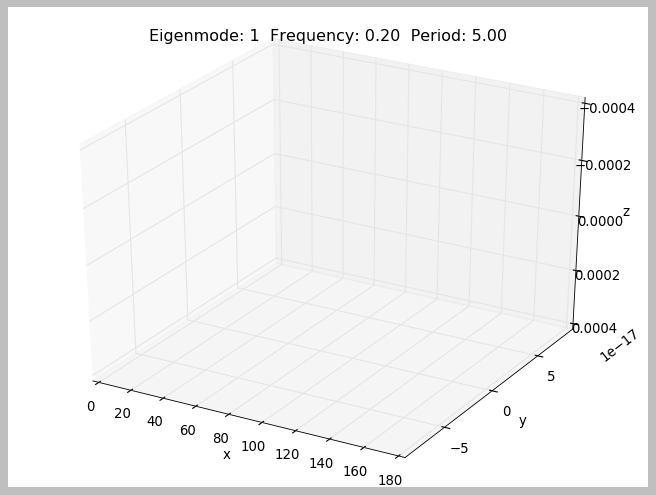

Postprocessing in DynamicAnalysis derived class 

Plotting result for a selected time step in DynamicAnalysis 

Plotting result for a selected time step in DynamicAnalysis 

Plotting result for a selected time step in DynamicAnalysis 

Plotting result for a selected step in DynamicAnalysis 

Plotting result for a selected step in DynamicAnalysis 

Plotting result for a selected step in DynamicAnalysis 

Animating time history in DynamicAnalysis 

Copying time step solution from solver


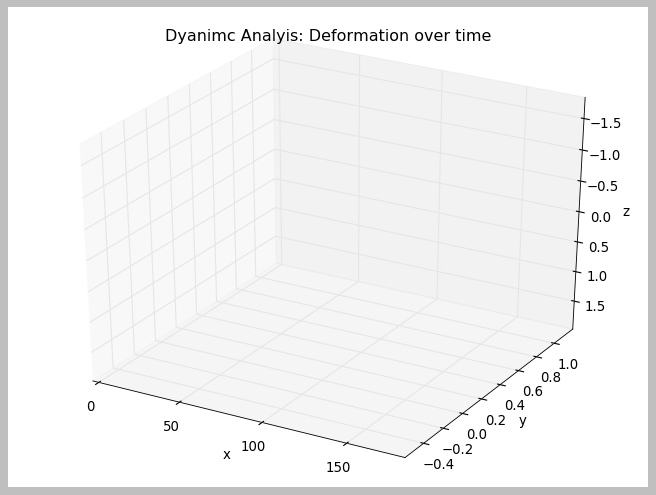

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Plotting result for selected dof in dynamic analysis 

Plotting result for selected dof in dynamic analysis 



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 



No handles with labels found to put in legend.


Plotting result for selected dof in dynamic analysis 

Writing result for selected dof in DynamicAnalysis 

Postprocessing in StaticAnalysis derived class 

Plotting result in StaticAnalysis 

Plotting result in StaticAnalysis 



In [12]:
# create initial model
beam_model = StraightBeam(parameters['model_parameters'])

# additional changes due to optimization
if 'optimization_parameters' in parameters:
    # return the model of the optimizable instance to preserve what is required by analyzis
    from source.model.optimizable_structure_model import OptimizableStraightBeam
    beam_model = OptimizableStraightBeam(
        beam_model, parameters['optimization_parameters']['adapt_for_target_values']).model
else:
    print('No need found for adapting structure for target values')

# ==============================================
# Analysis wrapper

analyses_controller = AnalysisController(
    beam_model, parameters['analyses_parameters'])
analyses_controller.solve()
analyses_controller.postprocess()